# Fase 2: Data Understanding

## 1. Estructura general del dataset

Objetivos:
- Ver forma (número de filas/columnas)  
- Conocer tipos de datos y columnas disponibles  
- Identificar claves únicas y columnas irrelevantes

## Carga de Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, f1_score, roc_curve

In [2]:
path = '/Users/luissalamanca/Desktop/Fundamentos ML/csgo-analysis/data/01_raw/Anexo_ET_demo_round_traces_2022.csv'

csgo = pd.read_csv(path, sep=';')

/var/folders/87/rvgg9k751y93dw0lf6gtp1600000gn/T/ipykernel_21023/1841683496.py:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(path, sep=';')


In [3]:
csgo.head(15)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
5,605,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,850,3750,0,0,0,0
6,606,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,400,3750,0,0,0,0
7,607,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,1,0,0,800,3750,0,0,1,0
8,608,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,3,0,1,1,850,3750,3,1,0,1
9,609,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,2,0,2,0,850,3750,2,0,0,2


## Información inicial de los datos

In [4]:
csgo.info()
#Nos entrega toda la información de las columnas y filas de los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

### Cuantas columnas y filas tenemos

In [5]:
print ('Los datos de entrenamiento tienen {0} filas y {1} columnas'.format(csgo.shape[0],csgo.shape[1]))
# Conocer la cantidad de filas y columnas del DataFrame

Los datos de entrenamiento tienen 79157 filas y 30 columnas


### Conocer las columnas del DataFrame

In [6]:
csgo.columns
# Conocer los nombre de las columnas del DataFrame

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto?

In [8]:
csgo.dtypes.value_counts()
# Con este comando se puede ver la cantidad total de cada tipo de dato.

int64      17
object      7
float64     4
bool        2
Name: count, dtype: int64

### ¿Existen valores nulos en el conjunto?

In [9]:
csgo.isnull().any()
# Verificar en cada columna si existen valores nulos con un retorno en boolean (True or False)

Unnamed: 0                     False
Map                            False
Team                            True
InternalTeamId                 False
MatchId                        False
RoundId                        False
RoundWinner                    False
MatchWinner                     True
Survived                       False
AbnormalMatch                  False
TimeAlive                      False
TravelledDistance              False
RLethalGrenadesThrown          False
RNonLethalGrenadesThrown       False
PrimaryAssaultRifle            False
PrimarySniperRifle             False
PrimaryHeavy                   False
PrimarySMG                     False
PrimaryPistol                  False
FirstKillTime                  False
RoundKills                     False
RoundAssists                   False
RoundHeadshots                 False
RoundFlankKills                False
RoundStartingEquipmentValue    False
TeamStartingEquipmentValue     False
MatchKills                     False
M

### Cuantos datos nulos tenemos por variables

In [10]:
# Calcula la cantidad de valores nulos
null_values = csgo.isnull().sum()

#Filtra los valores
null_values = null_values[null_values > 0]

print (null_values)

Team           2
MatchWinner    1
dtype: int64


## Revisión de columna RoundWinner

### Tipo de valor que entrega RoundWinner

In [11]:
# Esto imprimirá los valores únicos en la columna 'RoundWinner'
unique_values = csgo['RoundWinner'].unique()
print(unique_values)

['False' 'True' 'False4' True False]


### Tabla RoundWinner

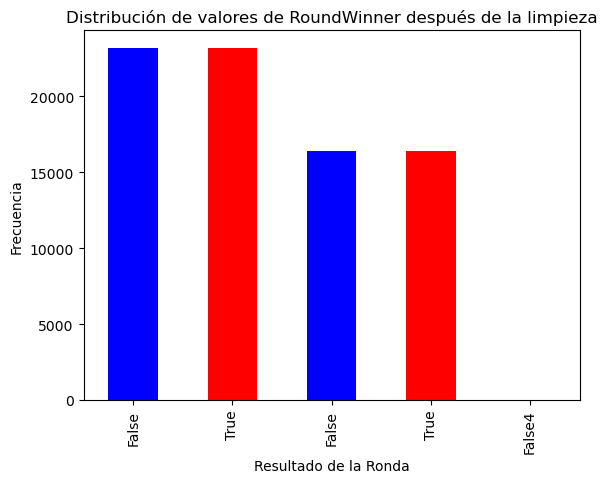

In [12]:
csgo['RoundWinner'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de valores de RoundWinner después de la limpieza')
plt.xlabel('Resultado de la Ronda')
plt.ylabel('Frecuencia')
plt.show()

### Corrección de valores de RoundWinner

In [13]:
#Correción de valor manualmente
csgo['RoundWinner'] = csgo['RoundWinner'].replace({'False4': 'False'})

# Verifica si hay más valores erróneos
print(csgo['RoundWinner'].unique())

['False' 'True' True False]


In [14]:
# Correción de valores convirtiéndolos a cadenas de texto
csgo['RoundWinner'] = csgo['RoundWinner'].astype(str)

# Verifica los valores únicos después de la corrección
print(csgo['RoundWinner'].unique())

['False' 'True']


### Visualización de la columna RoundWinner después de la limpieza

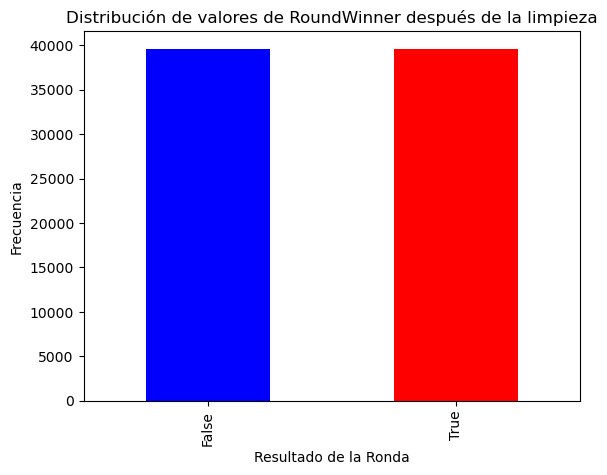

In [15]:
# Volvemos a revisar la columna RoundWinner para ver como quedaron nustros datos
csgo['RoundWinner'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de valores de RoundWinner después de la limpieza')
plt.xlabel('Resultado de la Ronda')
plt.ylabel('Frecuencia')
plt.show()

## Exploración de variables categóricas

- Distribución de mapas (`Map`)  
- Distribución de bandos (`Team`)  

Distribución de mapas:
 Map
de_inferno    0.364706
de_dust2      0.241545
de_mirage     0.240269
de_nuke       0.153480
Name: proportion, dtype: float64


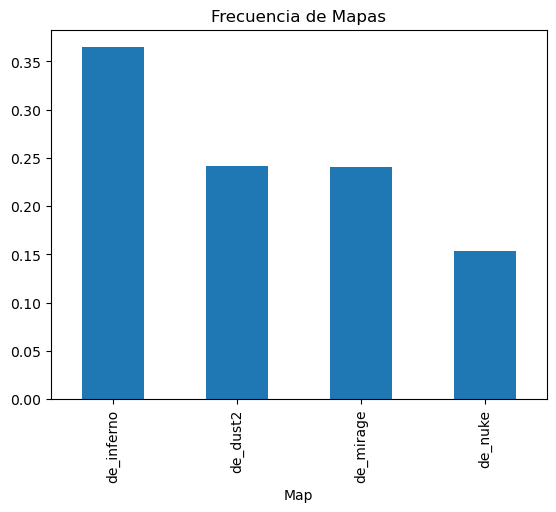

Distribución de equipos:
 Team
Terrorist           0.500171
CounterTerrorist    0.499829
Name: proportion, dtype: float64


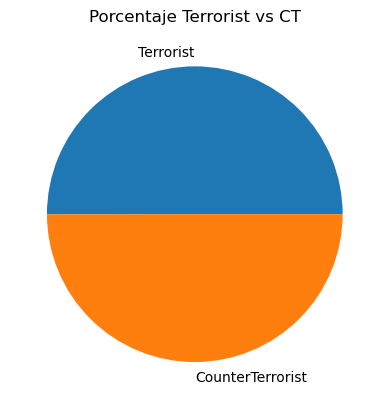

In [47]:
# Mapas
vc_map = csgo['Map'].value_counts(normalize=True)
print("Distribución de mapas:\n", vc_map)
vc_map.plot.bar(title="Frecuencia de Mapas"); plt.show()

# Team
vc_team = csgo['Team'].value_counts(normalize=True)
print("Distribución de equipos:\n", vc_team)
vc_team.plot.pie(title="Porcentaje Terrorist vs CT"); plt.ylabel(""); plt.show()

## Resumen estadístico de columnas numéricas (sin limpiar)

- Equipamiento inicial/de ronda  
- Kills, Assists, Headshots  
- Distancia recorrida (`TravelledDistance`)

In [51]:
num_cols = [
    'RoundKills','RoundAssists','RoundHeadshots',
    'TeamStartingEquipmentValue','RoundStartingEquipmentValue'
]
display(csgo[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0
RoundHeadshots,79157.0,0.301553,0.578843,0.0,0.0,0.0,0.0,5.0
TeamStartingEquipmentValue,79157.0,18890.133532,9743.203024,0.0,10900.0,22550.0,26050.0,36150.0
RoundStartingEquipmentValue,79157.0,3778.108695,2111.285406,0.0,1600.0,4700.0,5200.0,8850.0


### Imputación de valores nulos

In [17]:
# Este código imprime el índice de cada fila que tiene valores nulos y las columnas donde se encuentran esos nulos
for index, row in csgo[csgo.isnull().any(axis=1)].iterrows():
    print(f"Fila {index} tiene nulos en las columnas: {row[row.isnull()].index.tolist()}")

Fila 13 tiene nulos en las columnas: ['Team']
Fila 27 tiene nulos en las columnas: ['Team']
Fila 29 tiene nulos en las columnas: ['MatchWinner']


### Imputación de columna Team

In [18]:
def imputar_team_secuencial(df):
    # Asignar el valor basado en la secuencia repetitiva
    # Cada ciclo tiene 5 'Terrorist' seguido por 5 'CounterTerrorist'
    equipo_ciclo = ['Terrorist'] * 5 + ['CounterTerrorist'] * 5

    # Detectar el índice del ciclo basado en la posición del índice en el DataFrame
    for index, row in df.iterrows():
        if pd.isnull(row['Team']):
            # Calcular la posición en el ciclo de 10 filas (5 Terrorist + 5 CounterTerrorist)
            ciclo_index = index % 10
            # Asignar el valor del equipo según el ciclo
            df.at[index, 'Team'] = equipo_ciclo[ciclo_index]

    return df
# Aplicar la función para imputar los valores faltantes
csgo = imputar_team_secuencial(csgo)

# Verificar si la imputación se realizo de forma correcta
for index, row in csgo[csgo.isnull().any(axis=1)].iterrows():
    print(f"Fila {index} tiene nulos en las columnas: {row[row.isnull()].index.tolist()}")  

Fila 29 tiene nulos en las columnas: ['MatchWinner']


### Imputación de columna MatchWinner

In [52]:
#Correción de valor manualmente
csgo['MatchWinner'] = csgo['MatchWinner'].fillna(False)

for index, row in csgo[csgo.isnull().any(axis=1)].iterrows():
    print(f"Fila {index} tiene nulos en las columnas: {row[row.isnull()].index.tolist()}")

Fila 13 tiene nulos en las columnas: ['Team']
Fila 27 tiene nulos en las columnas: ['Team']


/var/folders/87/rvgg9k751y93dw0lf6gtp1600000gn/T/ipykernel_7090/1357407016.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  csgo['MatchWinner'] = csgo['MatchWinner'].fillna(False)


In [22]:
csgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

## ¿Tenemos una correlación dentro del conjunto de datos?

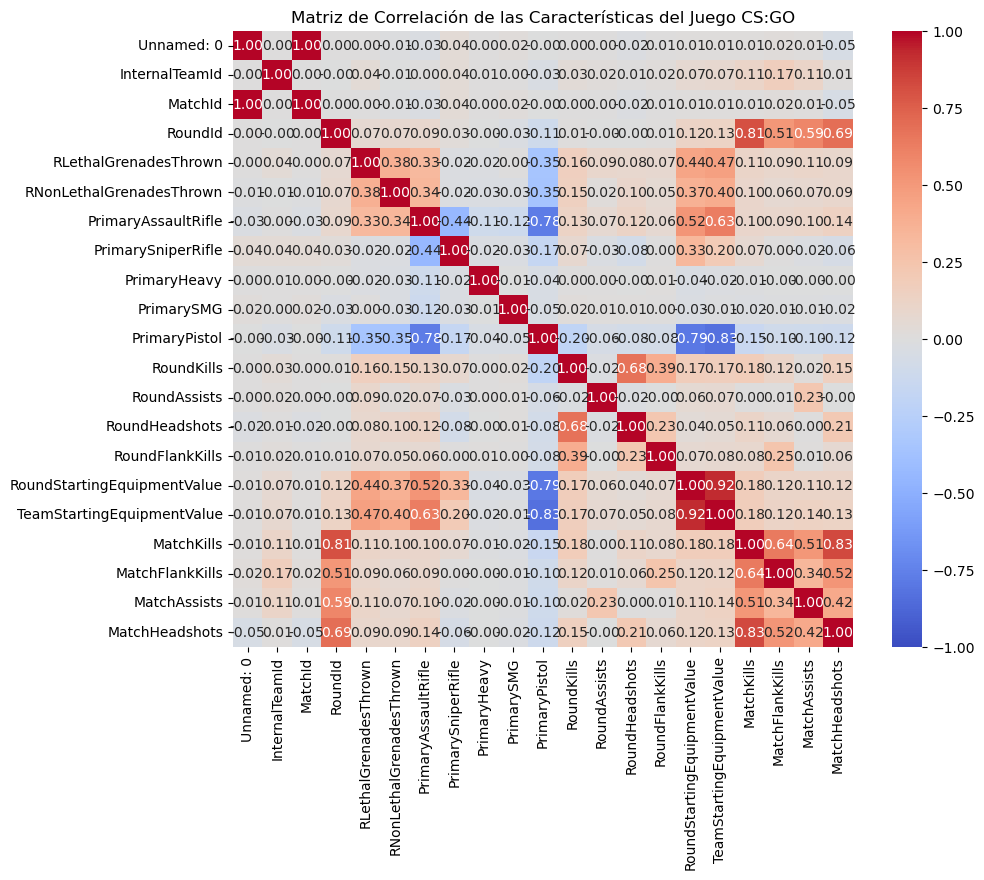

In [23]:
# Selección de Datos Numéricos
datosNumericos = csgo.select_dtypes(include=[np.number])

# Calcular la Matriz de Correlación
MatrizCorrelación = datosNumericos.corr()

# Creación del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(MatrizCorrelación, annot=True, fmt=".2f", center=0, vmin=-1, vmax=1,cmap='coolwarm')
plt.title('Matriz de Correlación de las Características del Juego CS:GO')

# Mostrar Diagrama
plt.show()

## Limpieza de los datos que no son relevantes

### Crear un nuevo conjunto de datos 'csgoData'

In [24]:
# Eliminación de columnas que no se ocuparan en la investigación
csgoData = csgo.drop(columns=[
    'Unnamed: 0', 'AbnormalMatch', 'TravelledDistance','RLethalGrenadesThrown',
    'RLethalGrenadesThrown','RNonLethalGrenadesThrown', 'MatchFlankKills','TimeAlive'
    ])
# Exploración inicial del nuevo conjunto
csgoData.head(10)

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,TimeAlive,PrimaryAssaultRifle,...,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,51.120.248.995.704.500,0.0,...,0.0,0,0,0,0,750,4400,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,4.348.662.552.266.170,0.0,...,0.0,0,0,0,0,800,4400,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,3.735.469.847.054.540,0.0,...,0.0,0,0,0,0,1000,4400,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,4.767.886.136.441.470,0.0,...,0.0,0,0,0,0,850,4400,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,5.312.251.089.027.310,0.0,...,0.0,0,0,0,0,1000,4400,0,0,0
5,de_inferno,CounterTerrorist,2,4,1,True,False,True,5.312.251.089.027.310,0.0,...,0.0,0,0,0,0,850,3750,0,0,0
6,de_inferno,CounterTerrorist,2,4,1,True,False,True,5.312.251.089.027.310,0.0,...,0.0,0,0,0,0,400,3750,0,0,0
7,de_inferno,CounterTerrorist,2,4,1,True,False,True,5.312.251.089.027.310,0.0,...,0.0,0,1,0,0,800,3750,0,1,0
8,de_inferno,CounterTerrorist,2,4,1,True,False,True,5.312.251.089.027.310,0.0,...,373.547,3,0,1,1,850,3750,3,0,1
9,de_inferno,CounterTerrorist,2,4,1,True,False,True,5.312.251.089.027.310,0.0,...,5.112.025,2,0,2,0,850,3750,2,0,2


### Verificar los tipos de dato de 'csgoData'

In [25]:
csgoData.dtypes
# Descripción de los tipos de datos para el DataSet 'csgoData'

Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                     object
MatchWinner                     object
Survived                          bool
TimeAlive                       object
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                   object
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValue       int64
MatchKills                       int64
MatchAssists                     int64
MatchHeadshots                   int64
dtype: object

### ¿Existe alguna relación dentro de este conjunto de datos?

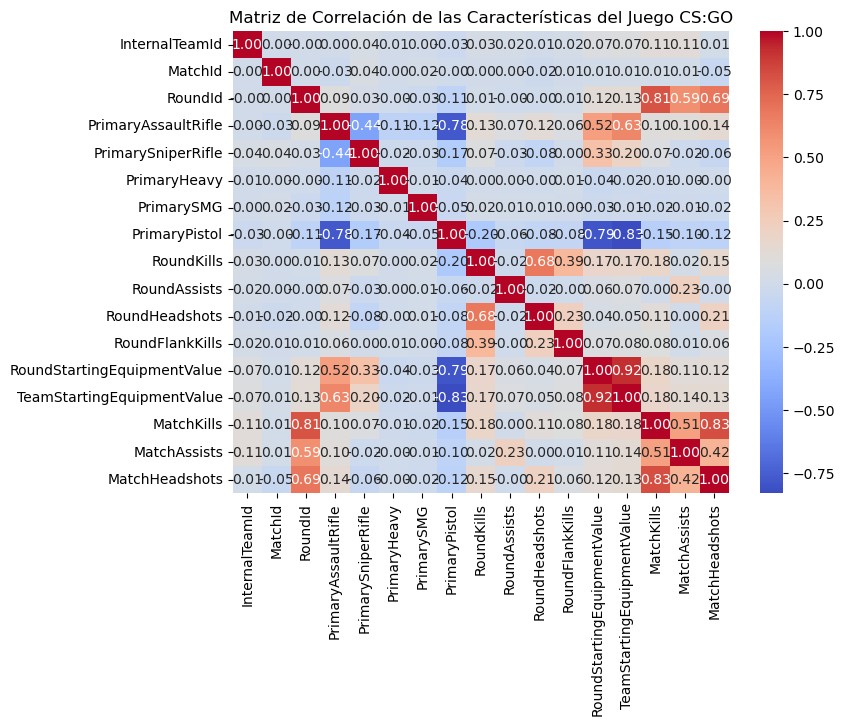

In [26]:
# Selección de Datos Numéricos
datosNumericos = csgoData.select_dtypes(include=[np.number])

# Calcular la Matriz de Correlación
MatrizCorrelación = datosNumericos.corr()

# Creación del mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(MatrizCorrelación, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de las Características del Juego CS:GO')

# Mostrar Diagrama
plt.show()

## Anova

In [27]:
# Seleccionar características relevantes para el ANOVA
features = ['MatchWinner', 'InternalTeamId', 'MatchId', 'RoundId', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchAssists', 'MatchHeadshots']
data_anova = csgoData[features]

# Verificar los tipos de datos
data_anova.dtypes

MatchWinner                     object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValue       int64
MatchKills                       int64
MatchAssists                     int64
MatchHeadshots                   int64
dtype: object

In [ ]:
# Realizar el ANOVA para cada característica
anova_results = {}
for feature in features[1:]:  # Excluir 'MatchWinner' de las características
    formula = f'{feature} ~ C(MatchWinner)'
    model = ols(formula, data=data_anova).fit()
    anova_table = anova_lm(model)
    anova_results[feature] = anova_table

# Combinar los resultados en un solo DataFrame para una mejor visualización
anova_results = pd.concat(anova_results, axis=0)

anova_results

### Filtro anova

In [29]:
# Filtrar resultados significativos (p-value < 0.05) Significa que tienen una alta relación
significant_results = anova_results[anova_results['PR(>F)'] < 0.05]

# Mostrar los resultados significativos
significant_results

,,df,sum_sq,mean_sq,F,PR(>F)
InternalTeamId,C(MatchWinner),1.0,1.249543e+02,1.249543e+02,502.980589,4.746665e-111
MatchId,C(MatchWinner),1.0,3.198648e+05,3.198648e+05,14.303115,1.557215e-04
RoundId,C(MatchWinner),1.0,1.593661e+03,1.593661e+03,28.856491,7.816349e-08
PrimaryAssaultRifle,C(MatchWinner),1.0,1.801598e+02,1.801598e+02,845.264356,7.353872e-185
PrimarySniperRifle,C(MatchWinner),1.0,5.516795e+00,5.516795e+00,70.530740,4.605255e-17
PrimaryHeavy,C(MatchWinner),1.0,5.649643e-02,5.649643e-02,9.913057,1.641712e-03
PrimarySMG,C(MatchWinner),1.0,4.670471e-01,4.670471e-01,68.757238,1.130845e-16
PrimaryPistol,C(MatchWinner),1.0,2.629868e+02,2.629868e+02,1553.551307,0.000000e+00
RoundKills,C(MatchWinner),1.0,7.146854e+02,7.146854e+02,929.910792,4.668223e-203
RoundAssists,C(MatchWinner),1.0,4.265173e+01,4.265173e+01,287.889764,1.864493e-64


## Descubrimiento RoundId

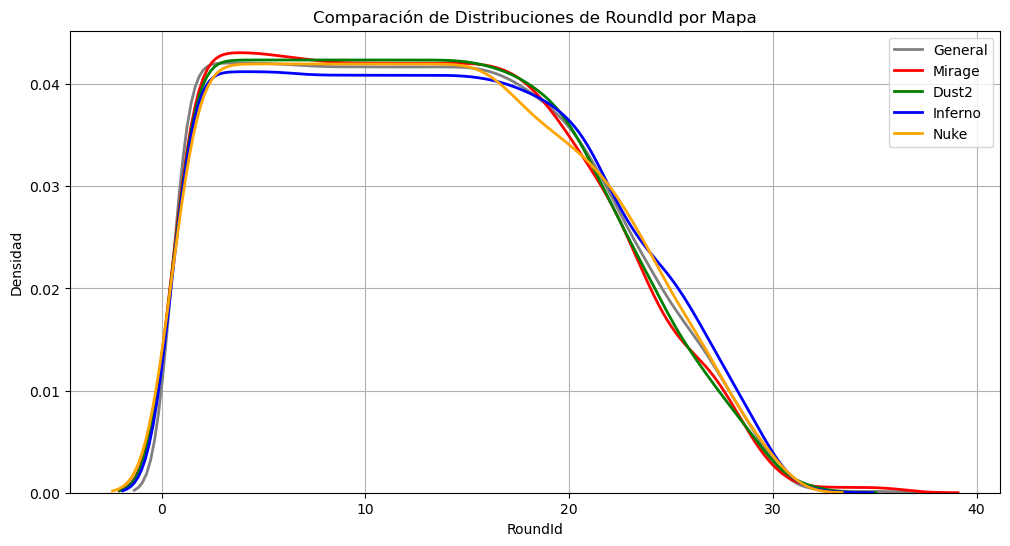

In [41]:
# --- DEFINIR TODOS LOS DATAFRAMES ---
mirage = csgoData[csgoData['Map'] == 'de_mirage']
dust2 = csgoData[csgoData['Map'] == 'de_dust2']
inferno = csgoData[csgoData['Map'] == 'de_inferno']
nuke = csgoData[csgoData['Map'] == 'de_nuke']

# --- HACER EL GRÁFICO CONJUNTO ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histograma de todos los mapas
sns.kdeplot(csgoData['RoundId'], label='General', color='gray', linewidth=2)
sns.kdeplot(mirage['RoundId'], label='Mirage', color='red', linewidth=2)
sns.kdeplot(dust2['RoundId'], label='Dust2', color='green', linewidth=2)
sns.kdeplot(inferno['RoundId'], label='Inferno', color='blue', linewidth=2)
sns.kdeplot(nuke['RoundId'], label='Nuke', color='orange', linewidth=2)

# Personalización
plt.title('Comparación de Distribuciones de RoundId por Mapa')
plt.xlabel('RoundId')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()